<a href="https://colab.research.google.com/github/RahulManavalan/Machine-Learning/blob/master/Dog_Cat_Breed_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload 
%autoreload 2 
%matplotlib inline 

In [0]:
from fastai.vision import * 
from fastai.metrics import error_rate

In [0]:
# Batch size moderation if the GPU happens to run out of memory 
bs = 64 
# bs = 16 

In [5]:
path = untar_data(URLs.PETS) 

In [0]:
path.ls()
path_anno = path/'annotations'
path_img = path/'images' 

In [0]:
fnames = get_image_files(path_img)
fnames[1:5]

In [0]:
np.random.seed(2) 
pat = '/([^/]+)_\d+.jpg$'

In [0]:
#import re 
#string = '/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_195.jpg'
#pat = '/([^/]+)_\d+.jpg$'
#pat = re.compile(pat) 
#a = (pat.search(string))
#a.group(1)

In [0]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat, ds_tfms = get_transforms(), size=224 , bs=bs).normalize(imagenet_stats) 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

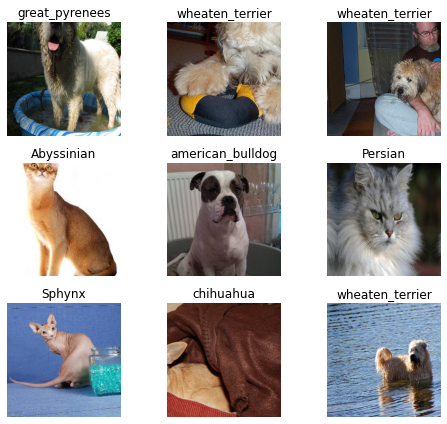

In [11]:
data.show_batch(rows=3,figsize=(7,6)) 

In [12]:
print(data.classes) 
len(data.classes) , data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [13]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate) 

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model

In [0]:
learn.fit_one_cycle(4) 

In [0]:
learn.save('stage-1') 

In [0]:
interp = ClassificationInterpretation.from_learner(learn) 

losses , idxs = interp.top_losses() 

len(data.valid_ds) == len(losses) == len(idxs)

In [23]:
idxs

tensor([ 651, 1394,  302,  ...,  560,  820,  324])

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


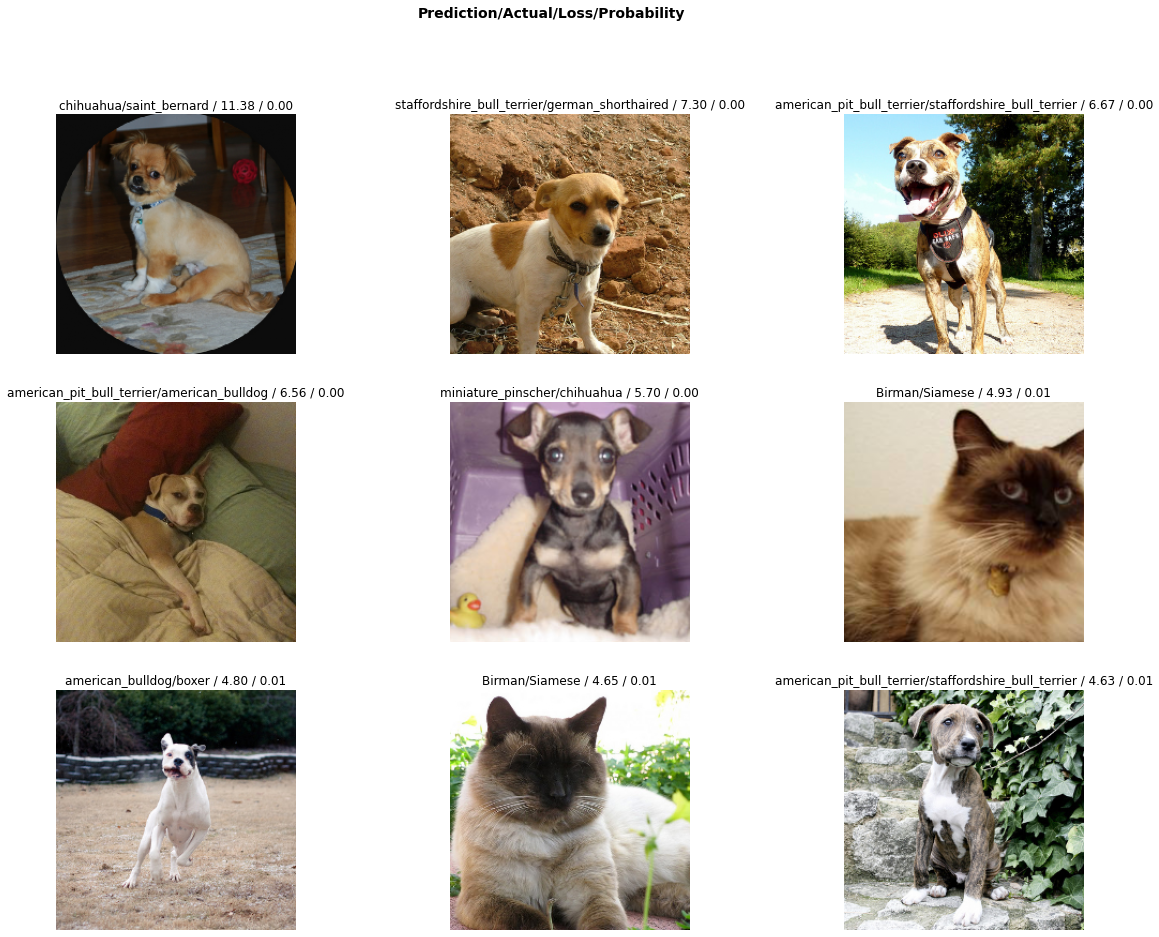

In [27]:
interp.plot_top_losses(9,figsize=(20,15))

In [28]:
doc(interp.plot_top_losses)

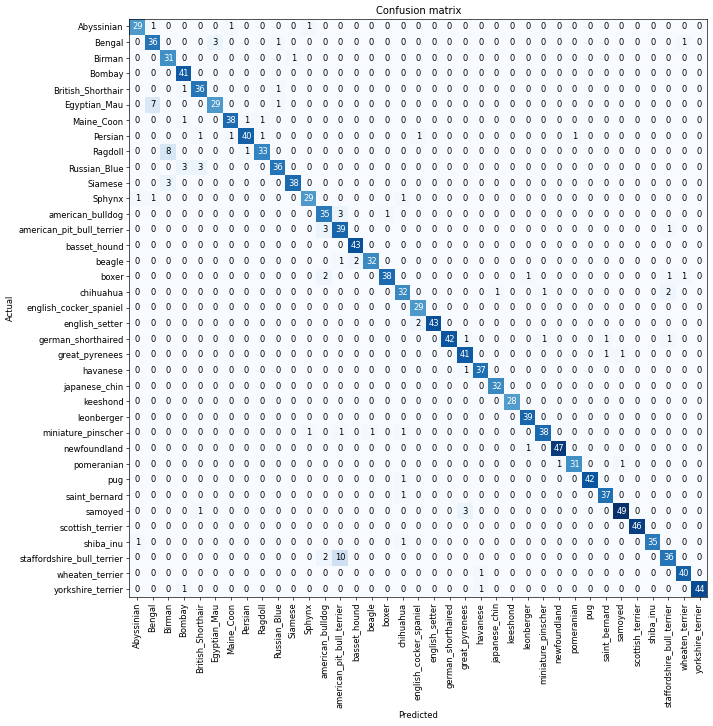

In [29]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60) 

In [30]:
interp.most_confused(min_val=2) 

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 10),
 ('Ragdoll', 'Birman', 8),
 ('Egyptian_Mau', 'Bengal', 7),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Russian_Blue', 'Bombay', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('Siamese', 'Birman', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'staffordshire_bull_terrier', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1) 

In [0]:
learn.load('stage-1')

In [0]:
learn.lr_find()

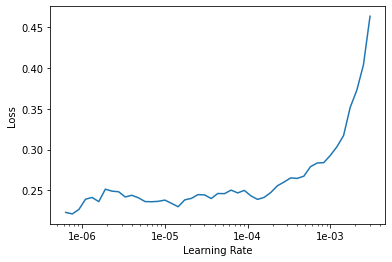

In [37]:
learn.recorder.plot()

In [0]:
learn.unfreeze() 
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))